In [157]:
import torch
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pickle

In [159]:
data = pd.read_csv('tables/data.csv')

In [161]:
data = data.drop(['Competition_Name','Gender', 'Country','Gender_away','Country_away', 'Competition_Name_away', 'Mins_Per_90_x', 'Mins_Per_90_x_away'], axis = 1)

In [163]:
data.describe()

,Wk,home_id,away_id,Num_Players,Season_End_Year,Tkl_Tackles,TklW_Tackles,Def 3rd_Tackles,Mid 3rd_Tackles,Att 3rd_Tackles,...,Carries_Carries_away,TotDist_Carries_away,PrgDist_Carries_away,PrgC_Carries_away,Final_Third_Carries_away,CPA_Carries_away,Mis_Carries_away,Dis_Carries_away,Rec_Receiving_away,PrgR_Receiving_away
count,1900.000000,1900.000000,1900.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,...,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000
mean,19.500000,54.600000,54.600000,29.220588,2021.500000,573.235294,340.485294,276.117647,224.411765,72.705882,...,12046.073529,63554.441176,32537.970588,625.426471,478.558824,146.014706,559.205882,322.323529,13701.411765,1343.852941
std,10.968743,35.365496,35.365496,3.039392,1.118467,54.302182,37.687519,38.931091,30.210172,14.881776,...,1412.248663,7701.187209,5117.748488,101.265402,78.958188,29.156204,55.658116,32.497164,1713.413198,216.750168
min,1.000000,1.000000,1.000000,25.000000,2020.000000,462.000000,269.000000,194.000000,163.000000,38.000000,...,9266.000000,49398.000000,23152.000000,376.000000,287.000000,78.000000,460.000000,256.000000,10223.000000,931.000000
25%,10.000000,19.000000,19.000000,26.750000,2020.750000,535.500000,317.750000,251.500000,200.000000,60.750000,...,11140.250000,57769.500000,29368.750000,555.750000,429.250000,130.750000,515.250000,300.000000,12639.500000,1197.000000
50%,19.500000,67.000000,67.000000,29.000000,2021.500000,575.000000,338.000000,270.500000,219.000000,71.000000,...,12149.500000,62758.000000,32023.500000,617.000000,480.500000,146.000000,558.000000,325.500000,13586.000000,1312.000000
75%,29.000000,91.000000,91.000000,31.000000,2022.250000,607.250000,361.750000,304.250000,253.000000,82.500000,...,12870.750000,68075.250000,35373.500000,679.250000,527.500000,163.000000,600.000000,343.000000,14916.250000,1489.750000
max,38.000000,104.000000,104.000000,38.000000,2023.000000,696.000000,428.000000,373.000000,279.000000,102.000000,...,15852.000000,87217.000000,48543.000000,863.000000,700.000000,236.000000,686.000000,424.000000,18860.000000,1876.000000


In [164]:
data = data[data['Num_Players'].notnull()]
data.describe()

,Wk,home_id,away_id,Num_Players,Season_End_Year,Tkl_Tackles,TklW_Tackles,Def 3rd_Tackles,Mid 3rd_Tackles,Att 3rd_Tackles,...,Carries_Carries_away,TotDist_Carries_away,PrgDist_Carries_away,PrgC_Carries_away,Final_Third_Carries_away,CPA_Carries_away,Mis_Carries_away,Dis_Carries_away,Rec_Receiving_away,PrgR_Receiving_away
count,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,...,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000
mean,19.489164,51.205882,52.870743,29.220588,2021.500000,573.235294,340.485294,276.117647,224.411765,72.705882,...,12046.073529,63554.441176,32537.970588,625.426471,478.558824,146.014706,559.205882,322.323529,13701.411765,1343.852941
std,10.999924,34.573883,35.049477,3.039392,1.118467,54.302182,37.687519,38.931091,30.210172,14.881776,...,1412.351229,7701.746516,5118.120170,101.272757,78.963922,29.158321,55.662158,32.499524,1713.537636,216.765909
min,1.000000,1.000000,1.000000,25.000000,2020.000000,462.000000,269.000000,194.000000,163.000000,38.000000,...,9266.000000,49398.000000,23152.000000,376.000000,287.000000,78.000000,460.000000,256.000000,10223.000000,931.000000
25%,10.000000,17.250000,19.000000,26.750000,2020.750000,535.500000,317.750000,251.500000,200.000000,60.750000,...,11140.250000,57769.500000,29368.750000,555.750000,429.250000,130.750000,515.250000,300.000000,12639.500000,1197.000000
50%,19.500000,60.500000,60.500000,29.000000,2021.500000,575.000000,338.000000,270.500000,219.000000,71.000000,...,12149.500000,62758.000000,32023.500000,617.000000,480.500000,146.000000,558.000000,325.500000,13586.000000,1312.000000
75%,29.000000,80.000000,91.000000,31.000000,2022.250000,607.250000,361.750000,304.250000,253.000000,82.500000,...,12870.750000,68075.250000,35373.500000,679.250000,527.500000,163.000000,600.000000,343.000000,14916.250000,1489.750000
max,38.000000,102.000000,104.000000,38.000000,2023.000000,696.000000,428.000000,373.000000,279.000000,102.000000,...,15852.000000,87217.000000,48543.000000,863.000000,700.000000,236.000000,686.000000,424.000000,18860.000000,1876.000000


In [168]:
data['home_id'] = np.array(data['away_id'])
data['away_id'] = np.array(data['away_id'])


encoder = LabelEncoder()

# Fit and transform the data
encoded_data = encoder.fit_transform(data['home_id'])
data['home_id'] = encoded_data
with open('home_encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

encoder = LabelEncoder()
encoded_data = encoder.fit_transform(data['away_id'])
data['away_id'] = encoded_data
with open('away_encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

In [176]:
data.head()

,Wk,home_id,away_id,result,Num_Players,Season_End_Year,Tkl_Tackles,TklW_Tackles,Def 3rd_Tackles,Mid 3rd_Tackles,...,Carries_Carries_away,TotDist_Carries_away,PrgDist_Carries_away,PrgC_Carries_away,Final_Third_Carries_away,CPA_Carries_away,Mis_Carries_away,Dis_Carries_away,Rec_Receiving_away,PrgR_Receiving_away
380,1,5,5,x,26.0,2020.0,567.0,338.0,240.0,228.0,...,11897.0,65184.0,33444.0,679.0,537.0,148.0,511.0,338.0,13334.0,1423.0
381,1,1,1,1,27.0,2020.0,584.0,349.0,257.0,257.0,...,12428.0,65062.0,33686.0,615.0,488.0,106.0,549.0,316.0,13538.0,1382.0
383,1,4,4,2,32.0,2020.0,579.0,346.0,261.0,265.0,...,10260.0,56375.0,28957.0,613.0,438.0,180.0,466.0,280.0,11524.0,1250.0
384,1,15,15,x,30.0,2020.0,568.0,327.0,316.0,204.0,...,10620.0,55968.0,26544.0,546.0,441.0,158.0,539.0,299.0,11562.0,1117.0
385,1,24,24,x,25.0,2020.0,553.0,323.0,250.0,239.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:

# Encode the target variable (if it's categorical)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['result'])  # Transform to 0, 1, 2
X = data.drop(columns=['result'])
with open('y_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)


# Perform an 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the target variable for ROC AUC score calculation
one_hot_encoder = OneHotEncoder(sparse_output=False)
y_test_onehot = one_hot_encoder.fit_transform(y_test.reshape(-1, 1))

# Create the XGBoost DMatrix objects for training and testing
train_data = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
test_data = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

# Set parameters for XGBoost with probabilities
params = {
    "objective": "multi:softprob",  # Predict probabilities for multi-class classification
    "num_class": 3,                # Number of classes
    "eval_metric": "mlogloss",     # Multi-class log loss
    "eta": 0.05,                   # Learning rate
    "max_depth": 3,                # Maximum tree depth
    "min_child_weight": 8,         # Minimum sum of instance weights
    "subsample": 0.3,              # Fraction of training samples used per tree
    "colsample_bytree": 0.4,       # Fraction of features used per tree
    "lambda": 10.0,                 # L2 regularization term
    "alpha": 1,                  # L1 regularization term
    "gamma": 2,                   # min_split_loss
    "seed": 42                   # Random seed
}

# Increase the number of boosting rounds
num_boost_round = 100

# Train the XGBoost model
bst = xgb.train(params, train_data, num_boost_round=num_boost_round)

In [183]:
# Predict probabilities on train and test sets
y_train_pred_prob = bst.predict(train_data)
y_test_pred_prob = bst.predict(test_data)
# Predict classes on train and test sets
y_train_pred = y_train_pred_prob.argmax(axis=1)
y_test_pred = y_test_pred_prob.argmax(axis=1)

# One-hot encode train labels for ROC AUC
y_train_onehot = one_hot_encoder.fit_transform(y_train.reshape(-1, 1))

# Evaluate on train set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train_onehot, y_train_pred_prob, multi_class="ovr")

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Train ROC AUC Score: {train_roc_auc:.2f}")
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred, target_names=label_encoder.classes_))

# Evaluate on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test_onehot, y_test_pred_prob, multi_class="ovr")

print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test ROC AUC Score: {test_roc_auc:.2f}")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


[[0.24615966 0.44626004 0.30758032]
 [0.26219726 0.49101895 0.24678382]
 [0.20367062 0.41737807 0.37895134]
 [0.6808699  0.08559833 0.23353186]
 [0.7198718  0.12493104 0.15519713]
 [0.48142815 0.16386789 0.35470393]
 [0.52264243 0.24263838 0.23471916]
 [0.48824912 0.31218252 0.19956836]
 [0.23007055 0.45897335 0.31095618]
 [0.33217442 0.37170115 0.2961244 ]
 [0.4435779  0.26373926 0.29268286]
 [0.21141405 0.50814855 0.28043735]
 [0.4072937  0.29786003 0.29484633]
 [0.20763868 0.5565329  0.23582841]
 [0.7143211  0.1122869  0.17339201]
 [0.39456418 0.2996051  0.3058307 ]
 [0.6895981  0.11598935 0.1944126 ]
 [0.74696845 0.09549506 0.15753654]
 [0.6313429  0.10841551 0.2602416 ]
 [0.5111088  0.20226952 0.28662166]
 [0.7477892  0.10190204 0.15030871]
 [0.16182734 0.5529212  0.28525147]
 [0.51383454 0.24778609 0.23837936]
 [0.20389166 0.6173126  0.17879573]
 [0.39474124 0.40900382 0.19625497]
 [0.5077165  0.1507273  0.34155625]
 [0.6031832  0.15780318 0.23901355]
 [0.32303068 0.45765427 0.21

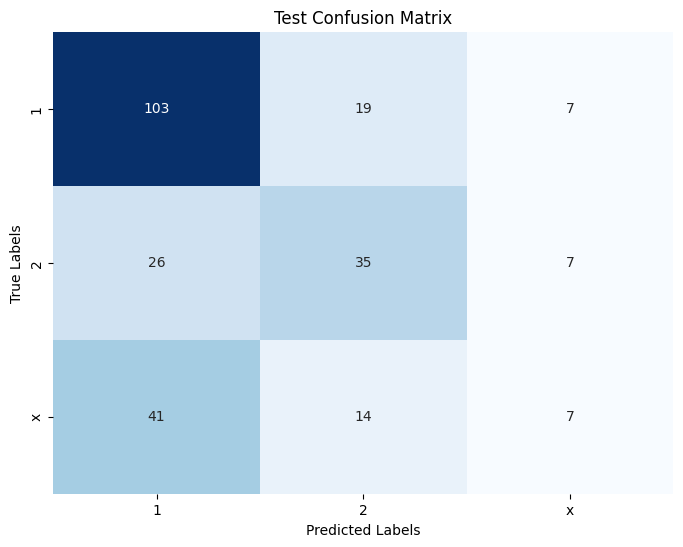

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Example data for a 3-class classification problem
y_true = y_test
y_pred = y_test_pred

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)
target_names=label_encoder.classes_

# Plot the confusion matrix with seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Test Confusion Matrix')
plt.show()

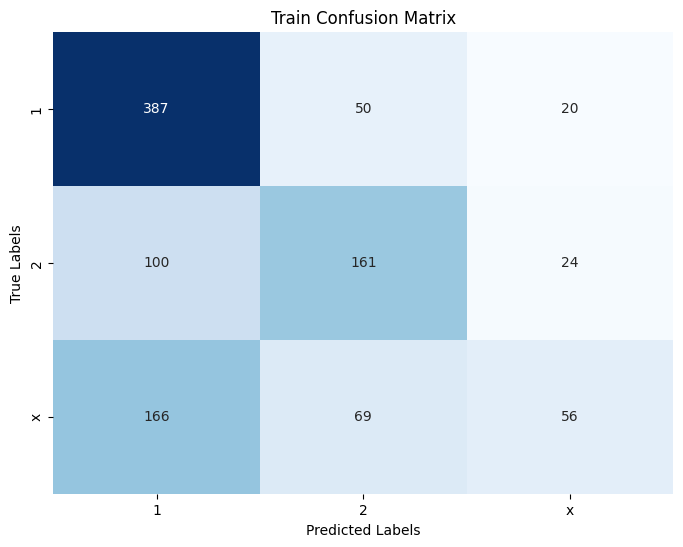

In [188]:
# Example data for a 3-class classification problem
y_true = y_train
y_pred = y_train_pred

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)
target_names=label_encoder.classes_

# Plot the confusion matrix with seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Train Confusion Matrix')
plt.show()

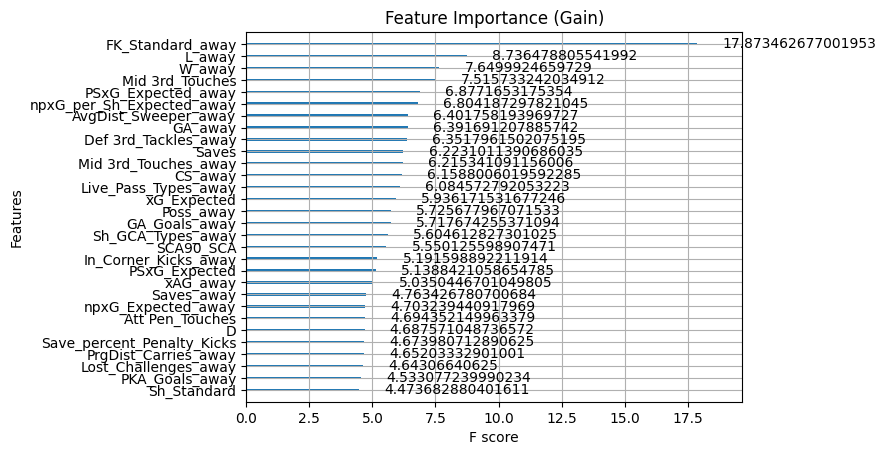

Feature Importance (Gain):
Wk: 2.611403226852417
home_id: 2.896876096725464
away_id: 3.088224172592163
Num_Players: 3.1859047412872314
TklW_Tackles: 2.7535319328308105
Def 3rd_Tackles: 2.343259811401367
Mid 3rd_Tackles: 2.3648061752319336
Att 3rd_Tackles: 3.224724292755127
Tkl_Challenges: 3.1920316219329834
Att_Challenges: 2.7094454765319824
Tkl_percent_Challenges: 2.462275743484497
Lost_Challenges: 2.6687777042388916
Blocks_Blocks: 2.694091320037842
Sh_Blocks: 2.8897929191589355
Pass_Blocks: 2.653062105178833
Int: 2.8512349128723145
Tkl_plus_Int: 2.4663846492767334
Clr: 3.473696231842041
Err: 2.7119128704071045
SCA90_SCA: 5.550125598907471
PassLive_SCA_Types: 2.5949392318725586
PassDead_SCA_Types: 2.917685031890869
TO_SCA_Types: 2.516517400741577
Sh_SCA_Types: 2.8527207374572754
Fld_SCA_Types: 2.298084259033203
Def_SCA_Types: 3.1468191146850586
GCA_GCA: 2.433929681777954
GCA90_GCA: 4.029318332672119
PassLive_GCA_Types: 2.293991804122925
PassDead_GCA_Types: 3.5033624172210693
TO_GCA_Ty

In [190]:
import matplotlib.pyplot as plt

# Plot feature importance (Gain by default)
xgb.plot_importance(bst, importance_type='gain', max_num_features=30)
plt.title("Feature Importance (Gain)")
plt.show()

# Get feature importance scores as a dictionary
importance_dict = bst.get_score(importance_type='gain')
print("Feature Importance (Gain):")
for feature, score in importance_dict.items():
    print(f"{feature}: {score}")


In [21]:
bst.save_model('xgboost_model.json')

In [23]:
# try to predict some games
# real madrid girona

team_stat = pd.read_csv('tables/team_stat.csv')
teams = pd.read_csv('tables/teams.csv')
seasons = pd.read_csv('tables/seasons.csv')
teams

,Squad,team_id,league_id
0,Almería,1,2.0
1,Athletic Club,6,2.0
2,Atlético Madrid,7,2.0
3,Barcelona,10,2.0
4,Betis,12,2.0
5,Celta Vigo,19,2.0
6,Cádiz,24,2.0
7,Elche,27,2.0
8,Espanyol,29,2.0
9,Getafe,34,2.0


In [91]:
#create a UI to predict games
# info needed: home, away, week, season
match_data = {
    'Wk' : [14],
    'home_team' : ['Real Madrid'],
    'away_team' : ['Valencia'],
    'season_end_year' : [2025]
}

match_data = pd.DataFrame(match_data)
match_data = pd.merge(match_data,teams[['Squad','team_id']], left_on=['home_team'], right_on=['Squad'], how='left')
print(match_data)
match_data = match_data.rename(columns={'team_id': 'home_id'})
match_data.drop(['Squad', 'home_team'], axis=1, inplace=True)


match_data = pd.merge(match_data,teams[['Squad','team_id']], left_on=['away_team'], right_on=['Squad'], how='left')
match_data = match_data.rename(columns={'team_id': 'away_id'})
match_data.drop(['Squad', 'away_team'], axis=1, inplace=True)

match_data = pd.merge(match_data,seasons[['Season_End_Year','season_id']], left_on=['season_end_year'], right_on=['Season_End_Year'], how='left')
match_data.drop(['Season_End_Year', 'season_end_year'], axis=1, inplace=True)


match_data

   Wk    home_team away_team  season_end_year        Squad  team_id
0  14  Real Madrid  Valencia             2025  Real Madrid       71


,Wk,home_id,away_id,season_id
0,14,71,91,5


In [95]:
match_data = pd.merge(match_data,team_stat, left_on=['home_id', 'season_id'], right_on=['team_id', 'next_season_id'], how='left')
match_data = match_data[match_data['Team_or_Opponent']!='opponent']
match_data.drop(['season_id_y', 'team_id', 'next_season_end', 'next_season_id', 'Team_or_Opponent'], axis=1, inplace=True)
match_data.rename(columns={'season_id_x': 'season_id'}, inplace=True)
match_data

,Wk,home_id,away_id,season_id,Num_Players,Mins_Per_90_x,Squad,league_id,Season_End_Year,Tkl_Tackles,...,Carries_Carries,TotDist_Carries,PrgDist_Carries,PrgC_Carries,Final_Third_Carries,CPA_Carries,Mis_Carries,Dis_Carries,Rec_Receiving,PrgR_Receiving
0,14,71,91,5,27,38,Real Madrid,2.0,2024,557,...,18483,97637,52448,950,802,315,480,312,21642,1923


In [97]:
team_stat_renamed = team_stat.rename(columns={col: f"{col}_away" for col in team_stat.columns})

In [99]:
match_data = pd.merge(match_data,team_stat_renamed, left_on=['away_id', 'season_id'], right_on=['team_id_away', 'next_season_id_away'], how='left')
match_data = match_data[match_data['Team_or_Opponent_away']!='team']
match_data.drop(['season_id_away', 'team_id_away', 'next_season_end_away', 'next_season_id_away', 'Team_or_Opponent_away'], axis=1, inplace=True)
match_data.rename(columns={'season_id_x': 'season_id'}, inplace=True)
match_data

,Wk,home_id,away_id,season_id,Num_Players,Mins_Per_90_x,Squad,league_id,Season_End_Year,Tkl_Tackles,...,Carries_Carries_away,TotDist_Carries_away,PrgDist_Carries_away,PrgC_Carries_away,Final_Third_Carries_away,CPA_Carries_away,Mis_Carries_away,Dis_Carries_away,Rec_Receiving_away,PrgR_Receiving_away
1,14,71,91,5,27,38,Real Madrid,2.0,2024,557,...,14210,70919,35120,621,459,147,635,348,16546,1575


In [101]:
match_data = match_data.drop(['Competition_Name','Gender', 'Country','Gender_away','Country_away', 'Competition_Name_away', 'Mins_Per_90_x', 'Mins_Per_90_x_away'], axis = 1)
match_data = match_data.drop(['season_id', 'Squad', 'league_id', 'Squad_away', 'league_id_away', 'Season_End_Year', 'Season_End_Year_away'], axis=1)
match_data

,Wk,home_id,away_id,Num_Players,Tkl_Tackles,TklW_Tackles,Def 3rd_Tackles,Mid 3rd_Tackles,Att 3rd_Tackles,Tkl_Challenges,...,Carries_Carries_away,TotDist_Carries_away,PrgDist_Carries_away,PrgC_Carries_away,Final_Third_Carries_away,CPA_Carries_away,Mis_Carries_away,Dis_Carries_away,Rec_Receiving_away,PrgR_Receiving_away
1,14,71,91,27,557,368,252,214,91,225,...,14210,70919,35120,621,459,147,635,348,16546,1575


In [103]:
#encode cat var
with open('home_encoder.pkl', 'rb') as file:
    loaded_encoder = pickle.load(file)
encoded_home = loaded_encoder.transform(match_data['home_id'])

with open('away_encoder.pkl', 'rb') as file:
    loaded_encoder = pickle.load(file)
encoded_away = loaded_encoder.transform(match_data['away_id'])



In [105]:
match_data['home_id'] = encoded_home
match_data['away_id'] = encoded_away

np.array(match_data['home_id'])

array([14], dtype=int64)

In [107]:
encoded_home

array([14], dtype=int64)

In [109]:
# team = pd.read_csv('tables/teams.csv')
# team[team['team_id']==91]
match_data

,Wk,home_id,away_id,Num_Players,Tkl_Tackles,TklW_Tackles,Def 3rd_Tackles,Mid 3rd_Tackles,Att 3rd_Tackles,Tkl_Challenges,...,Carries_Carries_away,TotDist_Carries_away,PrgDist_Carries_away,PrgC_Carries_away,Final_Third_Carries_away,CPA_Carries_away,Mis_Carries_away,Dis_Carries_away,Rec_Receiving_away,PrgR_Receiving_away
1,14,14,17,27,557,368,252,214,91,225,...,14210,70919,35120,621,459,147,635,348,16546,1575


In [111]:
#handle na values and errors reporting
if np.array(match_data.isnull()).sum() > 0:
    print('Impossible to predict the match result due to lack of data. One of the 2 squads did not played in the mayor league last year!')
else:
    #go on with the rest
    print('yep')

yep


In [151]:
#import model and predict
model = xgb.XGBClassifier()
model.load_model('xgboost_model.json')

with open('y_encoder.pkl', 'rb') as file:
    loaded_encoder = pickle.load(file)


# match_data = xgb.DMatrix(match_data, enable_categorical=True)
pred_proba = model.predict_proba(match_data)
pred = np.argmax(pred_proba)
print(pred_proba)
target_names = loaded_encoder.classes_

# Print probabilities for each class
for i, prob in enumerate(pred_proba[0]):  # Assuming match_data contains one row of input
    print(f"Class: {target_names[i]}, Probability: {prob*100:.1f}%")

pred = target_names[pred]
pred

[[0.6939273  0.10234745 0.20372528]]
Class: 1, Probability: 69.4%
Class: 2, Probability: 10.2%
Class: x, Probability: 20.4%


'1'

In [135]:
# print output (this model can make mistake statement)
if pred == 'x':
    print(f'The match will end in a drow')
elif pred == '1':
    print(f'{match_data['home_id']} will win the match')
else:
    print(f'{match_data['away_id']} will win the match')

#print the probability aoutput by the mdoel

#print final statemnt
print("\n\nThe model can make mistakes. Its output should be interpreted with caution and is not intended as professional advice or absolute truth.")


1    14
Name: home_id, dtype: int64 will win the match


The model can make mistakes. Its output should be interpreted with caution and is not intended as professional advice or absolute truth.


# UI

In [155]:
import tkinter as tk
from tkinter import ttk
import subprocess

def predict_result():
    # Get user inputs
    home_team = home_team_combobox.get().strip()
    away_team = away_team_combobox.get().strip()
    match_week = match_week_entry.get().strip()
    season_end = season_end_entry.get().strip()

    # Validate inputs
    if not home_team or not away_team or not match_week.isdigit() or not season_end.isdigit():
        result_text.delete(1.0, tk.END)  # Clear previous content
        result_text.insert(tk.END, "Error: Please provide valid inputs.")
        return

    # Provide feedback while processing
    result_text.delete(1.0, tk.END)
    result_text.insert(tk.END, "Processing, please wait...")
    root.update_idletasks()

    try:
        # Run the prediction script
        result = subprocess.run(
            ['python', 'predict.py', home_team, away_team, match_week, season_end],
            capture_output=True,
            text=True,
            check=True
        )
        # Display the output
        result_text.delete(1.0, tk.END)  # Clear previous content
        result_text.insert(tk.END, f"Prediction: {result.stdout.strip()}")
        
    except subprocess.CalledProcessError as e:
        result_text.delete(1.0, tk.END)  # Clear previous content
        result_text.insert(tk.END, f"Error: {e.stderr.encode().strip()}")  # Display the error message

        result_text.insert(tk.END, f"Error: {e.stderr.strip()}" if e.stderr else "An error occurred.")
        
    except FileNotFoundError:
        result_text.delete(1.0, tk.END)  # Clear previous content
        result_text.insert(tk.END, "Error: 'predict.py' not found.")

# Set up the Tkinter window
root = tk.Tk()
root.title("Match Predictor")
root.geometry("400x500")  # Increased height to accommodate listbox

team_options = teams['Squad'].tolist()

# Create dropdown for home team
home_team_label = tk.Label(root, text="Home Team:", font=("Arial", 12))
home_team_label.pack(pady=5)
home_team_combobox = ttk.Combobox(root, values=team_options, font=("Arial", 12))
home_team_combobox.pack(pady=5)
home_team_combobox.set("Select Home Team")  # Set default placeholder

# Create dropdown for away team
away_team_label = tk.Label(root, text="Away Team:", font=("Arial", 12))
away_team_label.pack(pady=5)
away_team_combobox = ttk.Combobox(root, values=team_options, font=("Arial", 12))
away_team_combobox.pack(pady=5)
away_team_combobox.set("Select Away Team")  # Set default placeholder


match_week_label = tk.Label(root, text="Match Week:", font=("Arial", 12))
match_week_label.pack(pady=5)
match_week_entry = tk.Entry(root, font=("Arial", 12))
match_week_entry.pack(pady=5)

season_end_label = tk.Label(root, text="Season End Year:", font=("Arial", 12))
season_end_label.pack(pady=5)
season_end_entry = tk.Entry(root, font=("Arial", 12))
season_end_entry.pack(pady=5)
season_end_entry.insert(0, "2025")

# Create predict button
predict_button = tk.Button(root, text="Predict Result", font=("Arial", 12), command=predict_result)
predict_button.pack(pady=20)

# Create a Listbox widget for team names
team_listbox = tk.Text(root, height=1, width=90, font=("Arial", 12))
team_listbox.pack(pady=5)

# Add placeholder text to the Listbox
team_listbox.insert(tk.END, "If an error occurs most probably one of the two team did not play in 'La Liga' last year.")

# Create a Text widget with a Scrollbar to display results
result_frame = tk.Frame(root)
result_frame.pack(pady=10)

# Create a Text widget for showing predictions or errors
result_text = tk.Text(result_frame, height=30, width=90, font=("Arial", 12))
result_text.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

# Add a vertical scrollbar to the Text widget
scrollbar = tk.Scrollbar(result_frame, orient=tk.VERTICAL, command=result_text.yview)
scrollbar.pack(side=tk.RIGHT, fill=tk.Y)
result_text.config(yscrollcommand=scrollbar.set)

# Start the Tkinter event loop
root.mainloop()
